# House Pricing

    Iteration 0, An Intuition-Based Model
    Iteration 1, Train a Decision Tree
    Piplines Creation
    Iteration 2, Grid Search - to find the best parameters of the model
    Iteration 2, Grid Search - to find the best parameters of the pipeline


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.width', 1000)  # or adjust as necessary

In [7]:

house_it_0_2 = pd.read_csv('/your_path/housing_iteration_0_2_classification.csv')


In [8]:
house_it_0_2

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

# Basic exploration

In [10]:
house_it_0_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [12]:
house_it_0_2.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64

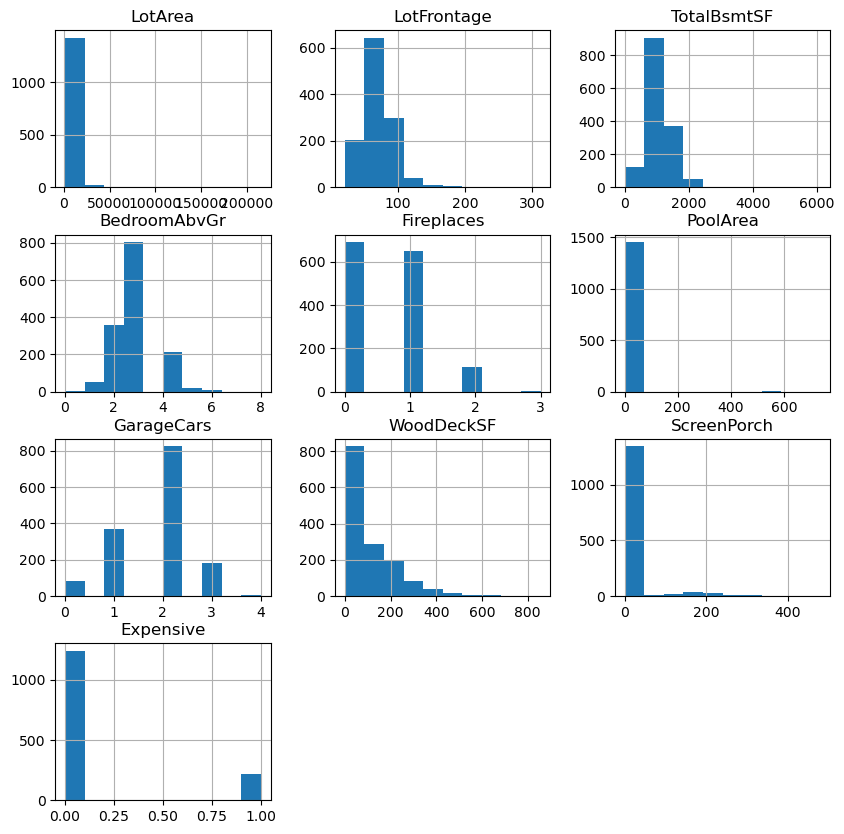

In [14]:
house_it_0_2.hist(figsize=(10, 10));

### Train-test split

In [15]:
y = house_it_0_2.pop("Expensive")

In [16]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [26]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

# Creating Predictor Features (X)

The columns you use to make the predictions


In [21]:
X = house_it_0_2
X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [24]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
772,7819,94.0,1029,3,1,0,2,144,0
157,12003,92.0,774,4,1,0,3,0,0
360,7540,NaN,888,2,1,0,2,0,192
744,5395,41.0,1337,2,1,0,2,96,0
150,10356,120.0,969,3,0,0,2,0,0


In [25]:
y_train.head()

772    0
157    1
360    0
744    0
150    0
Name: Expensive, dtype: int64

##  Iteration 0 - An intuition-based model

How well can we predict if a house is expensive or not?

### This prediction assumes that all houses are not expensive. 

Define a rule that determines whether a house is expensive or not.
Write a function that takes a DataFrame of housing data as an input, and based on the rule you defined, outputs a list with predictions about whether a house is expensive or not (1 or 0).
Use Scikit-Learn’s accuracy_score to check how well your rule makes predictions on the test set.

In [27]:
#Count the values expensive or not 
y_train.value_counts()

Expensive
0    989
1    179
Name: count, dtype: int64

In [29]:
#Predicting model stating that all houses are not expansive (0) for the training data 
pred_optimistic_train = pd.Series(0, index=range(len(X_train)))

In [30]:
#How good are the predictions? #Now: how good are those predictions? We will compare them with the true values and find out the percentage of correctly predicted passengers. This metric is called accuracy:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_optimistic_train
                                 )

round(train_accuracy, 2)

0.85

In [31]:
#How good is in our test data?
len(y_test)

292

In [32]:
pred_optimistic_test = pd.Series(0, index=range(292))

In [33]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_optimistic_test
                               )

round(test_accuracy, 2)

0.87

In [46]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
772,7819,94.0,1029,3,1,0,2,144,0
157,12003,92.0,774,4,1,0,3,0,0
360,7540,NaN,888,2,1,0,2,0,192
744,5395,41.0,1337,2,1,0,2,96,0
150,10356,120.0,969,3,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
252,8366,65.0,798,3,0,0,2,138,0
679,9945,NaN,988,3,0,0,2,0,0
1449,1533,21.0,630,1,0,0,0,0,0
322,10380,86.0,1502,4,1,0,2,201,0


In [52]:
# Create a new Series to store the predictions
from sklearn.metrics import accuracy_score
pred_pool_train = pd.Series(0, index=range(len(X_train)))

# Set the prediction to houses are expensive if the pool areas is greater than 1 
pred_pool_train[X_train["PoolArea"].values >= 1] = 1

In [53]:
#How good are the predictions with the pool? 
#Accuracy of the trainning data
train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pool_train
                                 )

round(train_accuracy, 2)

0.85

In [54]:
# Create a new Series to store the predictions
pred_pool_test = pd.Series(0, index=range(len(X_test)))

# Set the prediction to houses are expensive if the pool areas is greater than 1 
pred_pool_test[X_test["PoolArea"].values >= 1] = 1

In [55]:
#Accuracy of the test data 
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_pool_test
                               )

test_accuracy_rounded = round(test_accuracy, 2)
round(test_accuracy, 2)

0.87

C:\Users\Irene\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


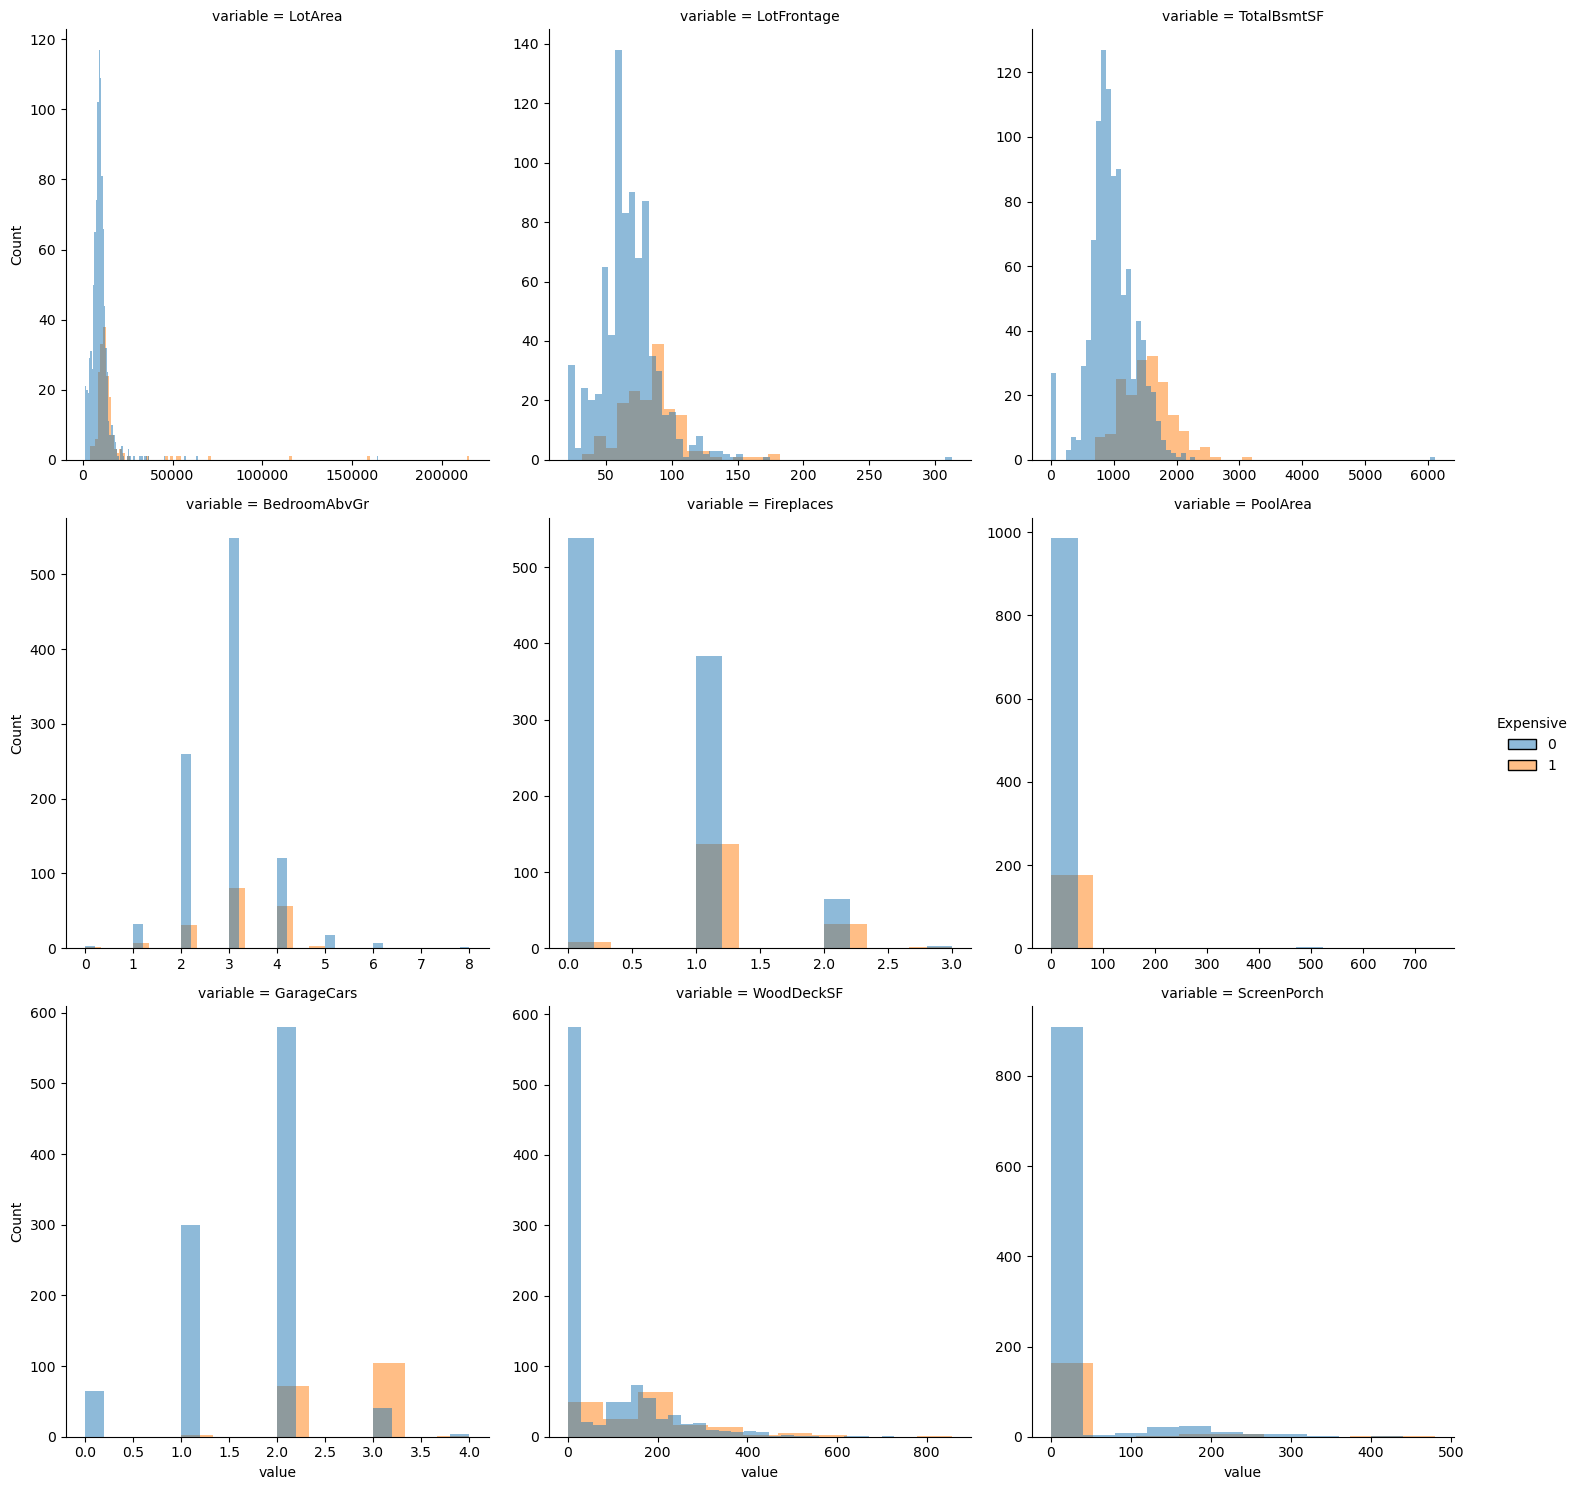

In [56]:
sns.displot(
  data=X_train.melt(ignore_index=False).join(y_train).reset_index(), 
  col='variable',
  hue='Expensive',
  #kind='kde',
  col_wrap=3,
  common_bins=False,
  facet_kws = dict(sharex=False, sharey=False)
);

    X_train.melt(ignore_index=False): This transforms the X_train DataFrame into a long format, where each row represents a single observation for a variable. The ignore_index=False parameter keeps the original index.
    
    .join(y_train): This joins the melted X_train data with y_train data. It's assumed that y_train has a column named Expensive which is a binary target variable (e.g., 0 for not expensive, 1 for expensive).
    
    .reset_index(): This resets the index of the DataFrame after the join operation.

In [57]:
def estimate_expensive(X, totalBsmtSFThresh = 900, lotThresh = 9100, garageCarsThresh = 2):
  return X.TotalBsmtSF > totalBsmtSFThresh and X.LotArea > lotThresh and X.GarageCars > garageCarsThresh

ranges = {
  'totalBsmtSFThresh': range(0,2000,50),
  'lotThresh': range(0,20000,100),
  'garageCarsThresh': range(0, 4)
}

def largest_kv(x):
  k = max(x, key=x.get)
  return (k, x[k])

for par, r in ranges.items():
  print(f'best {par}:', 
    largest_kv({ thresh: accuracy_score(
      y_pred=X_train.apply(lambda x: estimate_expensive(x, **{par: thresh}), axis=1),
      y_true=y_train)
      for thresh in r})
  )

best totalBsmtSFThresh: (1000, 0.910958904109589)
best lotThresh: (8600, 0.9092465753424658)
best garageCarsThresh: (2, 0.9092465753424658)


## Impute the missing values with the mean or the median of their column.
## Train a Decision Tree to predict the prices of the houses.
### Prune the Decision Tree and improve its performance as much as you can.

Training Accuracy: 1.0
Test Accuracy: 0.8732876712328768


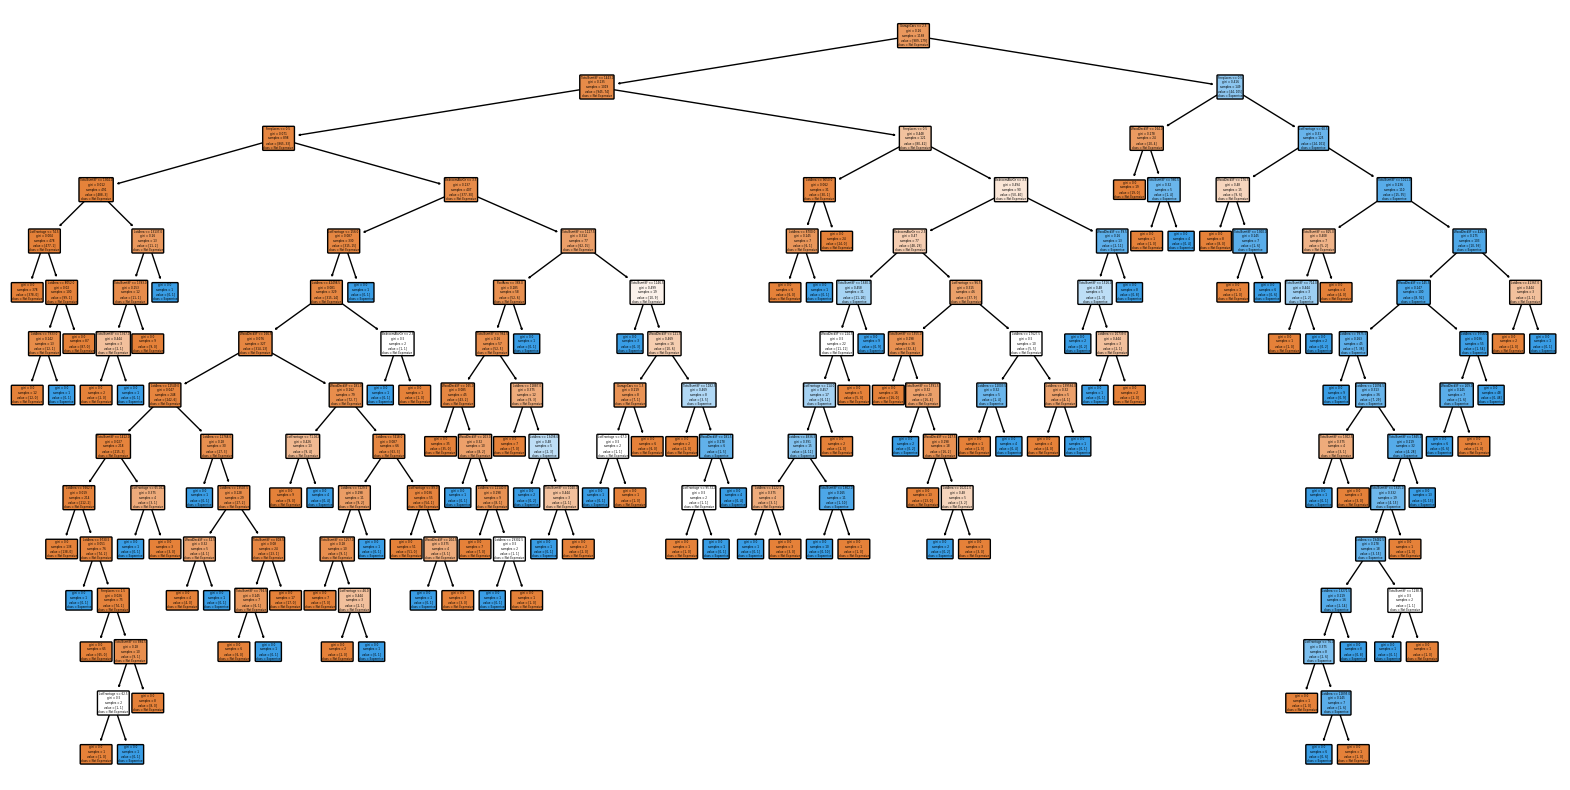

In [108]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined and available

# Imputing the data
# 1. Initialize the imputer
my_imputer = SimpleImputer()

# 2. Fit the imputer on the train set #here also looks for null values and calculate the median
my_imputer.fit(X_train)

# 3. Transform the train and test sets #here changes the null values to the meadia that was calculated 
X_imputed_train = pd.DataFrame(my_imputer.transform(X_train), columns=X_train.columns)
X_imputed_test = pd.DataFrame(my_imputer.transform(X_test), columns=X_test.columns)

# Implement a Decision Tree
# 1. Initialize the model
my_tree = DecisionTreeClassifier()

# 2. Fit the model to the train data
my_tree.fit(X_imputed_train, y_train)

# Make predictions
# Predict on training set
y_pred_tree_train = my_tree.predict(X_imputed_train)

# Check accuracy on the train set
train_accuracy = accuracy_score(y_true=y_train, y_pred=y_pred_tree_train)
print(f'Training Accuracy: {train_accuracy}')

# Predict on test set
y_pred_tree_test = my_tree.predict(X_imputed_test)

# Check accuracy score on the test set
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_tree_test)
print(f'Test Accuracy: {test_accuracy}')

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(my_tree, filled=True, rounded=True, class_names=['Not Expensive', 'Expensive'], feature_names=list(X_imputed_train.columns))
plt.show()


    Training Accuracy: 1.0: This indicates that the model has perfectly learned the training dataset. However, such a high accuracy on training data is often indicative of overfitting, where the model is too closely tailored to the training data and may not perform well on unseen data.

    Test Accuracy: 0.8732876712328768: This is the accuracy on the test data, which is lower than the training accuracy but still quite high. The discrepancy between the training and test accuracy reinforces the possibility of overfitting.

To address overfitting, you might consider:

    -Pruning the decision tree (limiting its depth or the number of leaf nodes).
    -Using cross-validation for more robust evaluation.
    -Trying other models or adding regularization to the decision tree if supported.
    -Investigating more features or different feature engineering techniques.

Always remember to test different approaches to find the best model that not only learns well from the training data but also generalizes effectively to new, unseen data.

## Iteration 1, Train a Decision Tree 

In [111]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf= 10, random_state = 123)

# 3. fit the model to the train data (X needs to be capital)
my_tree.fit(X = X_imputed_train,
            y = y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=123)

In [112]:
#Make predictions training data 
y_pred_tree_train = my_tree.predict(X_imputed_train)

#Check accuracy on the train set
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                y_pred = y_pred_tree_train
                                )

train_accuracy_rounded = round(train_accuracy, 4)

print("The training data prediction is {:.2%} accurate".format(train_accuracy_rounded))

The training data prediction is 92.29% accurate


In [114]:
#Make predictions test data 
y_pred_tree_test = my_tree.predict(X_imputed_test)

#Check accuracy on the test set
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = y_pred_tree_test
                               )

test_accuracy_rounded = round(test_accuracy, 4)

print("The test data prediction is {:.2%} accurate".format(test_accuracy_rounded))

The test data prediction is 92.81% accurate


# Piplines Creation

In [115]:
#Simple imputer and decision tree classifier already imported 
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
#Import standard scaler if you want to include in the pipeline as well
from sklearn.preprocessing import StandardScaler
#Import make_pipeline
from sklearn.pipeline import make_pipeline

To perform hyperparameter tuning in a more random way, you can use Randomized Search instead of Grid Search. While Grid Search exhaustively tries all possible combinations of hyperparameters specified in your param_grid, Randomized Search randomly selects a fixed number of combinations. This approach can be more efficient, especially when dealing with a large hyperparameter space, as it can explore a wider range of values without the need for exhaustive computation.

Here's how you can implement Randomized Search in Python using scikit-learn, given your param_grid:

Choosing values for hyperparameters like those in a DecisionTreeClassifier depends heavily on the specific characteristics of your dataset and the problem you're trying to solve. However, I can provide some general guidelines and considerations for selecting hyperparameter ranges:

    max_depth: This controls the maximum depth of the tree. Deeper trees can model more complex patterns, but they also risk overfitting. Typically, values between 3 and 10 can be a good starting point. For very complex datasets, you might want to go higher. If your model is overfitting, consider lowering this value.

    min_samples_leaf: This parameter controls the minimum number of samples required to form a leaf. Higher values prevent the model from memorizing the data (overfitting) but can lead to underfitting if set too high. A range between 1 and 20 is common, but for larger datasets, you might consider higher values.

    min_samples_split: This parameter determines the minimum number of samples required to split an internal node. Values typically range between 2 and 40. Higher values prevent creating nodes that only apply to a few samples, which can be a sign of overfitting.

    criterion: The function to measure the quality of a split. 'gini' and 'entropy' are both commonly used. 'gini' is slightly faster to compute, while 'entropy' (a measure of information gain) can sometimes produce more balanced trees.

    Other Parameters:
        max_features: The number of features to consider when looking for the best split. Setting it to 'sqrt' (square root of the number of features) or 'log2' is often effective, especially for datasets with a large number of features.
        max_leaf_nodes: Limits the number of leaf nodes in the tree. This can be useful for controlling the size of the tree and preventing overfitting.

Remember, these are starting points. The optimal values can vary greatly depending on your specific dataset. It's often beneficial to start with a broad range and then refine it based on the results of initial experiments. Additionally, using techniques like cross-validation can help determine which values work best for your particular scenario.

## Iteration 2, Grid Search - to find the best parameters of the model

So far, we tuned the hyperparameters of the decision tree manually. This is not ideal, for two reasons:

It's not efficient in terms of quickly finding the best combination of parameters.
If we keep checking the performance on the test set over and over again, we might end up creating a model that fits that particular test set, but does not generalize as well with new data. Test sets are meant to reamain unseen until the very last moment of ML development.



In [116]:
# 1. initialize transformers & model without specifying the parameters
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

In [121]:
# Create the parameter grid
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}




In [122]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use,
                      verbose=1) # we want informative outputs during the training process

In [124]:
# fit
search.fit(X_train, y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             scoring='accuracy', verbose=1)

In [125]:
# cross validation average accuracy
search.best_score_

0.9280950808847805

In [126]:
# best parameters
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 38,
 'simpleimputer__strategy': 'mean'}

In [136]:
search.best_estimator_.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [137]:
accuracy_score(search.predict(X_test), y_test)

0.934931506849315

In [139]:
search.best_estimator_[1].feature_importances_

array([0.00699881, 0.03120449, 0.15881484, 0.0832007 , 0.14493479,
       0.        , 0.56955832, 0.00528805, 0.        ])

In [127]:
# training accuracy
y_train_pred = search.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

train_accuracy_rounded = round(train_accuracy, 4)

print("The training data prediction is {:.2%} accurate".format(train_accuracy_rounded))

The training data prediction is 93.32% accurate


In [128]:
# testing accuracy
y_test_pred = search.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

test_accuracy_rounded = round(test_accuracy, 4)

print("The test data prediction is {:.2%} accurate".format(test_accuracy_rounded))

The test data prediction is 93.49% accurate


In [129]:
search.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=38)

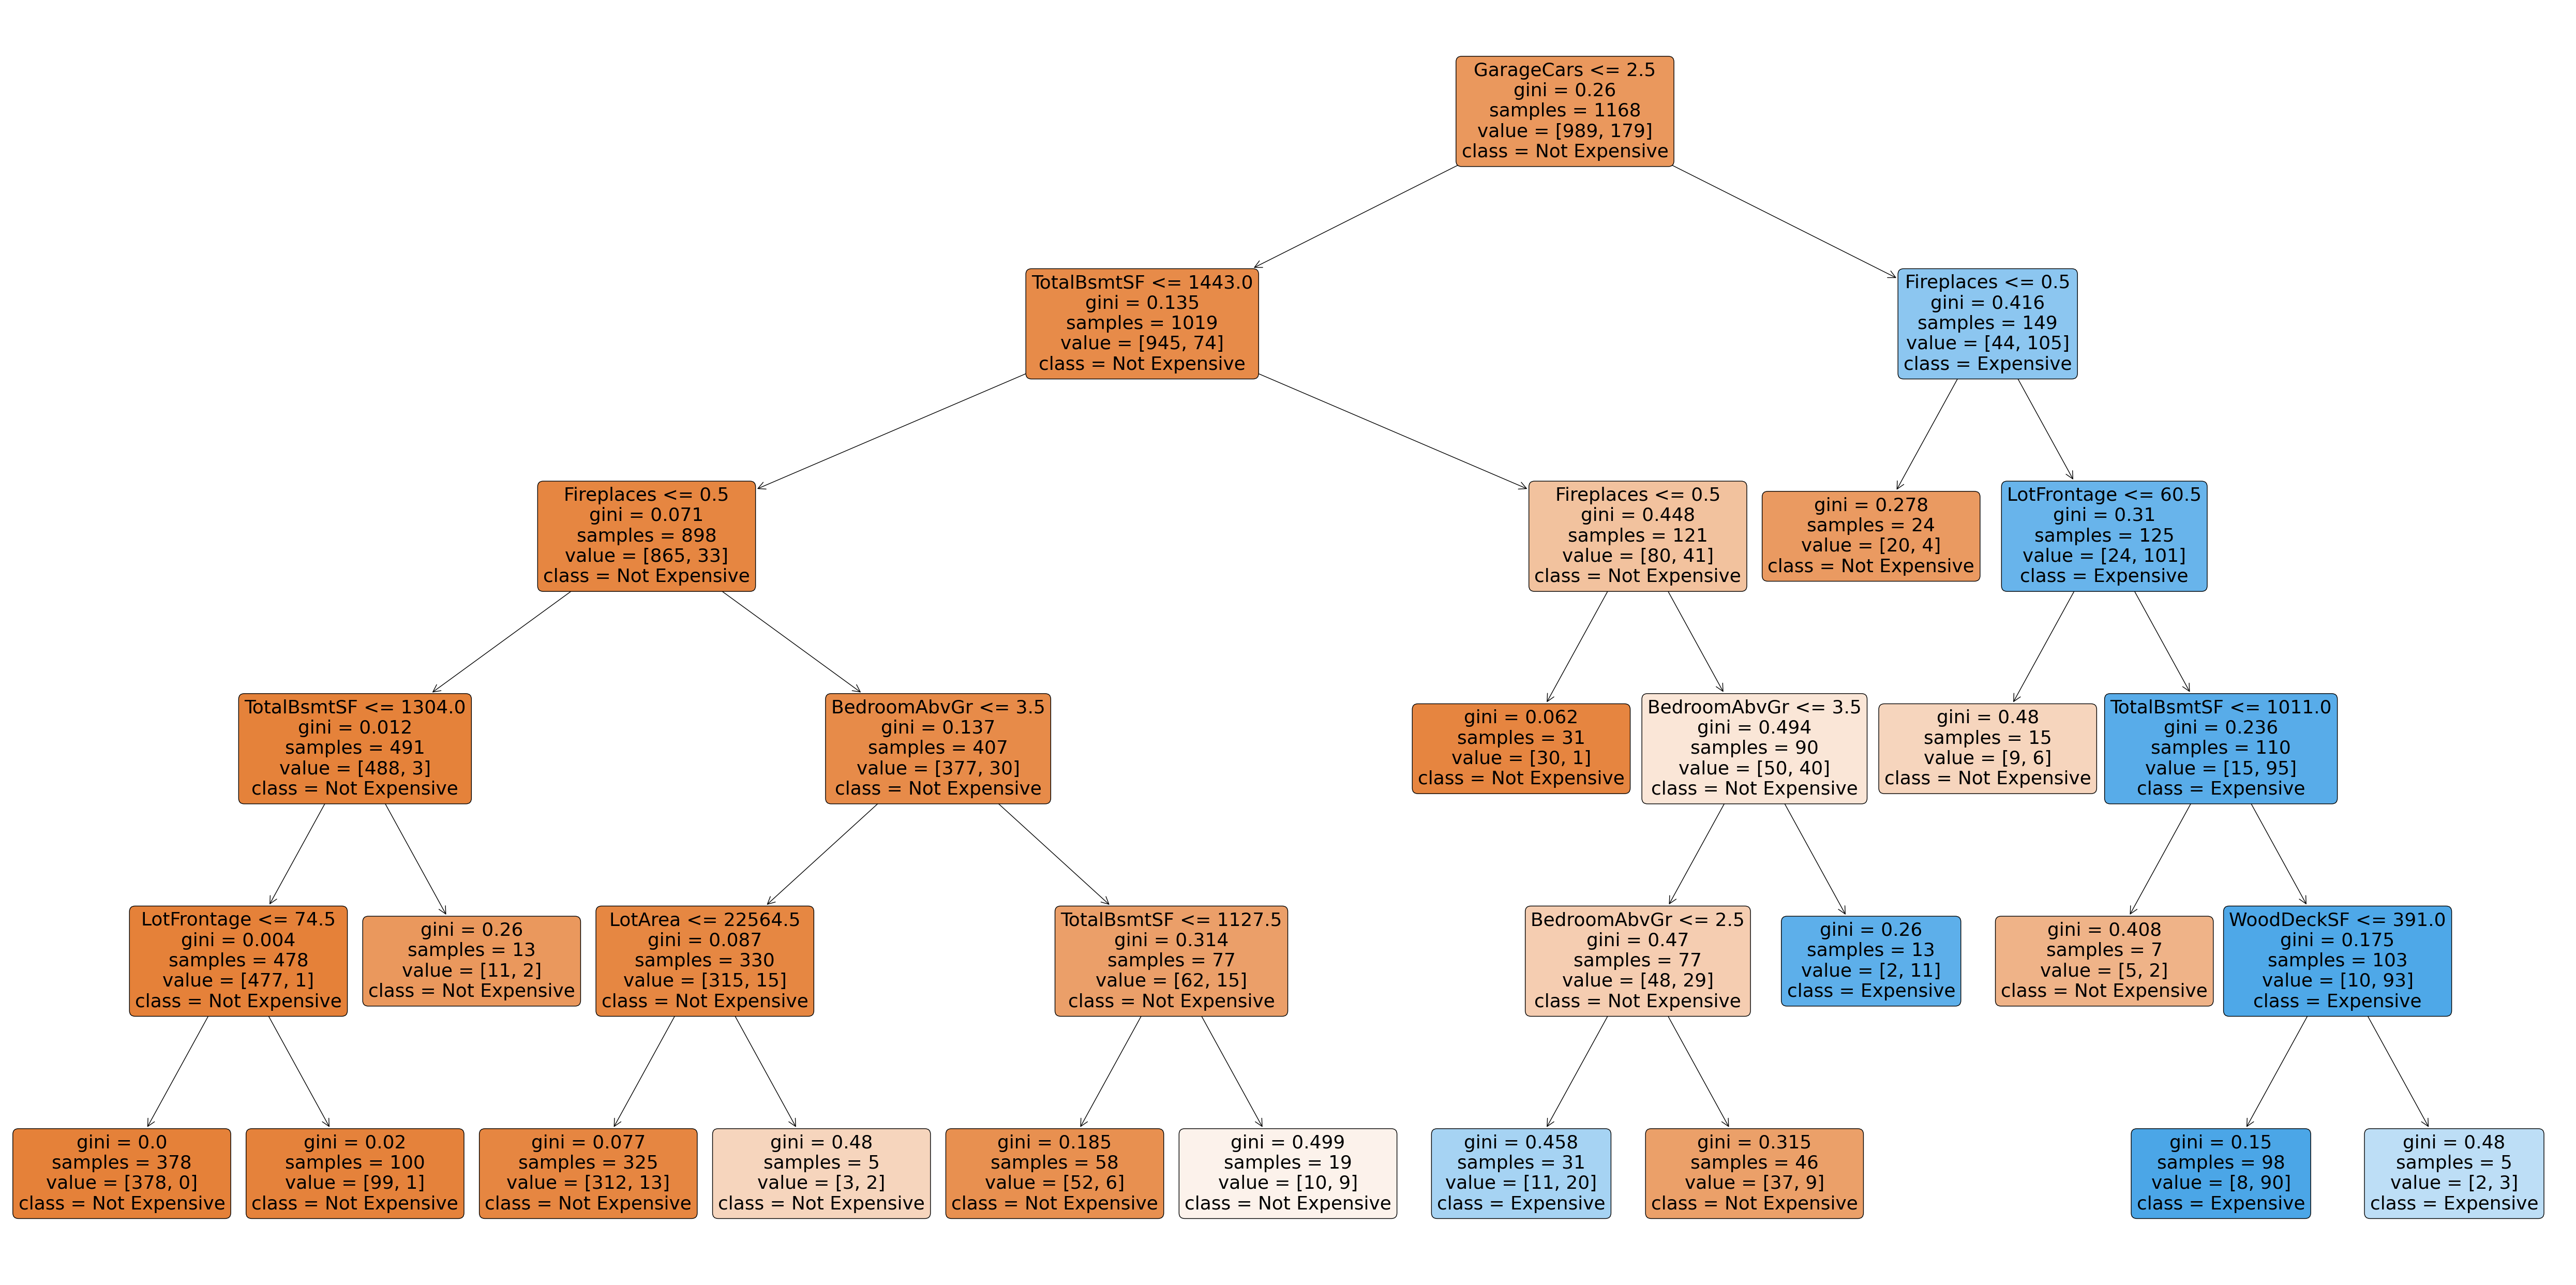

In [133]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
    search.best_estimator_.named_steps['decisiontreeclassifier'],
    filled=True,
    rounded=True,
    class_names=['Not Expensive', 'Expensive'],
    feature_names=list(X_train.columns)  # Convert to list
);
